# Maximum Likelihood Estimator (MLE)

We consider a random variable $x$, distributed according to the probability density function
$$P(x \mid a) = \frac{1}{2}(1 + ax) for − 1 ≤ x ≤ 1 and 0 ≤ α ≤ 1.$$
n = 20 measurements of this random variable gave the sample found in MLE.txt.

In [34]:
# Let's load the necessary libraries
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

# And the MLE data set
mle = np.loadtxt("data/MLE.txt")

First of all, we create a function that calculates the negative-log-likelihood function NLL(α) = −lnL(α)
for these data as a function of α. We plot it for 0 ≤ α ≤ 1.

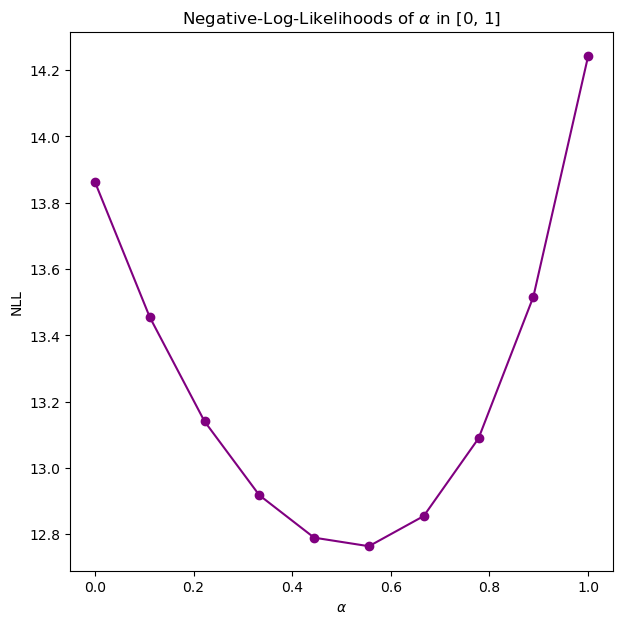

In [35]:
def nll(prob):
    """Calculate the negative log likelihood for a dataset and its predictions.

    Args:
        data (array): The data set.
        prob (array): Predicted probabilities for the data set.

    Returns:
        float: The negative log likelihood.
    """

    return -1 * np.sum(np.log(prob))

def nll_alpha(data, alpha):
    """Calculate the negative log likelihood for exercise 1a.

    Args:
        alpha (float): The alpha parameter.

    Returns:
        float: The negative log likelihood.
    """

    prob_mle = 0.5 * (1 + alpha * data)
    NLL = nll(prob = prob_mle)

    return NLL

alphas = np.linspace(0, 1, 10)
nll_values = [nll_alpha(mle, alpha) for alpha in alphas]

fig, ax = plt.subplots(1, 1, figsize = (7, 7))

ax.plot(alphas, nll_values, marker = "o", color = "purple")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("NLL")
ax.set_title(r"Negative-Log-Likelihoods of $\alpha$ in [0, 1]")
plt.savefig("1a_NLL_of_alphas.png")

Now, we are able to determine the MLE $\hat{\alpha}$ using our data of the NLL. The lowest NLL is at $\alpha = 0.56$

In [36]:
i = np.argwhere(nll_values == min(nll_values))[0][0]
min_a = alphas[i]
print(min_a)  # load the data set

0.5555555555555556


# Maximumm likelihood and least squares
In the file *exponential_data.txt* there are 1000 decay time measurements between 0 and 5 μs of muons, which have a mean lifetime of τ = 2 μs. It is that we know the PDF used to generate this data, which is:
$$P(t) = \frac{1}{\tau * (1 - e^{-5/\tau})} * e^{-t / \tau$$
where $\tau$ is the mean decay time in $\mu s$ and t is the measured decay time.

In [37]:
# load the data
ddecay = np.loadtxt("data/exponential_data.txt")

# define the function
def P_t(x, tau):
    return 1 / (tau * (1 - np.exp(-5 / tau)))\
                  * np.exp(-1 * x / tau)

Similarly to before, we calculate twice the negative-log-likelihood (2·NLL($\tau$)) as a function of the lifetime
$\tau$. We shift the values of the 2·NLL($\tau$) such that the minimum is zero (for convience) and plot it for $1.8 < \tau < 2.2 \mu s$.

Text(0.5, 1.0, 'Negative-Log-Likelihoods of tau in (1.8, 2.2)')

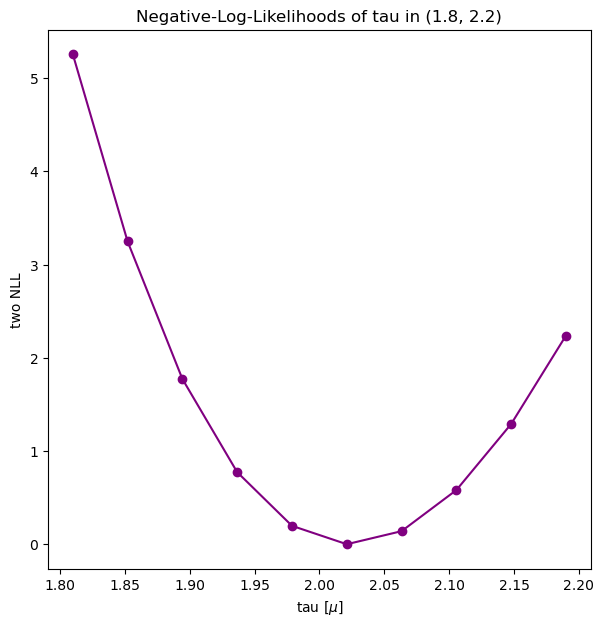

In [38]:
def two_nll(prob):
    """Calculate 2 times the negative log likelihood for a dataset and its probabilites.

    Args:
        data (array): The data set.
        prob (array): Predicted probabilities for the data set.

    Returns:
        float: 2 times the negative log likelihood.
    """
    return 2 * nll(prob)  # lets use existing code


def two_nll_tau(ddecay, tau):
    prob_decay_times = 1 / (tau * (1 - np.exp(-5 / tau))) \
                       * np.exp(-1 * ddecay / tau)

    two_NLL = two_nll(prob=prob_decay_times)

    return two_NLL

# define taus
taus = np.linspace(1.81, 2.19, 10)
# compute two nll
two_nll_values = [two_nll_tau(ddecay, tau) for tau in taus]
two_nll_values -= min(two_nll_values)  # shift of minimum to zero

# plot
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(taus, two_nll_values, marker="o", color="purple")
ax.set_xlabel("tau [$\mu$]")
ax.set_ylabel("two NLL")
ax.set_title("Negative-Log-Likelihoods of tau in (1.8, 2.2)")

Next, we bin the time measurements into a histogram of 40 equally sized bins, from 0 to 5 $\mu s$. Use the binned maximum likelihood method to calculate twice the negative-log-likelihood (2·NLL($\tau$)) for these 40 bins as a function of $\tau$. We shift the values of the 2·NLL such that the minimum is zero and overlay the plot with the unbinned calculation in the last code cell. Does it matter if we approximate the integral (by using the mean of the bin) of the function when computing the prediction?

In [39]:

def binned_2nll(data, tau, nbins, integrate=False):
    """Calculate 2 times the negative log likelihood for a dataset and its probabilites.

    Args:
        data (array): The data set.
        prob (array): Predicted probabilities for the data set.
        nbins (int): Number of bins to use.

    Returns:
        float: 2 times the binned negative log likelihood.
    """

    counts, edges = np.histogram(data, bins=nbins, range = (0, 5))  # get the counts and bin edges. Not sure what they are? Check the documentation!
    # or use the debugger to inspect the variables.
    if integrate:
        pass # scipy intergate
    else:
        bincenter = 0.5 * (edges[1:] + edges[:-1])
        pred = P_t(bincenter, tau)
        bwidth = np.array([edges[i] - edges[i-1] for i in range(len(edges))])
        approx = pred * bwidth[1:]

    return -np.sum(counts * np.log(approx) - approx)

Text(0.5, 1.0, 'Negative-Log-Likelihoods approximated with bincenter')

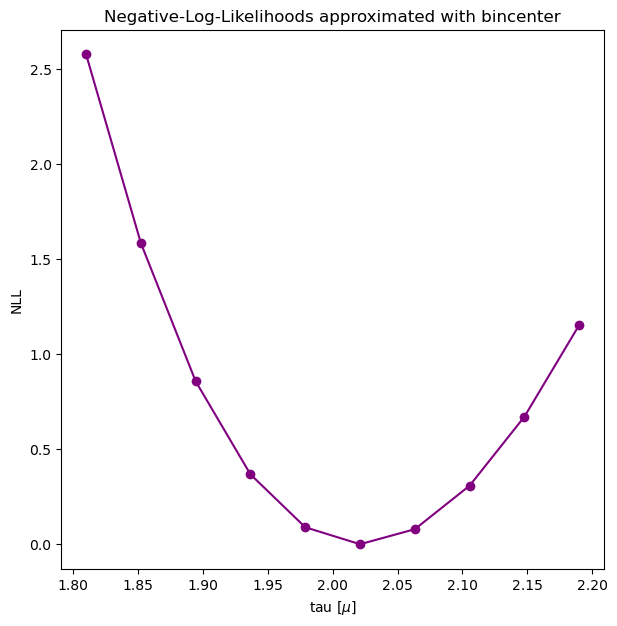

In [40]:
two_nll_values_bin = [binned_2nll(ddecay, tau, 40) for tau in taus] # implement integrate
two_nll_values_bin -= min(two_nll_values_bin) # shift of minimum to zero

# plot integrate and not integrate

fig, ax = plt.subplots(1, 1, figsize = (7, 7))

ax.plot(taus, two_nll_values_bin, marker = "o", color = "purple")
ax.set_xlabel("tau [$\mu$]")
ax.set_ylabel("NLL")
ax.set_title("Negative-Log-Likelihoods approximated with bincenter")

The trajectory of the binned function seems to have lower NLL values overall. Nevertheless, they both display their minimum at the same tau.

Lets create a $\chi^2$ function and calculate the $\chi^2$ as a function of $\tau$ . Plot it and overlay it on the NLL plot with the previous two calculations. we shift the $\chi^2$ also such that the minimum is at zero and compare the results.

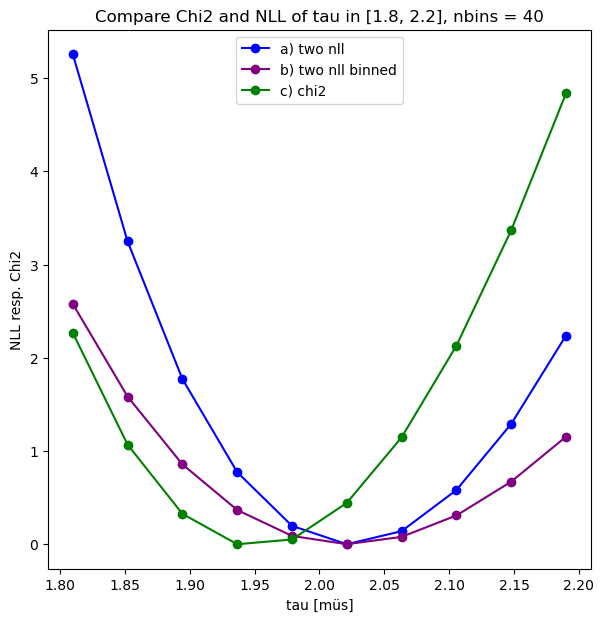

In [41]:
def chi2_stat(tau, nbins):

    """Calculate the chi2 statistic for a dataset and its predictions.

    Args:
        x (array): The first data set.
        y (array): Predicted values for the first data set.
        err (array): The error on the measurements of the first data set.

    Returns:
        float: The chi2 statistic.
    """
    x = np.loadtxt("data/exponential_data.txt")
    counts, edges = np.histogram(x, nbins, range=(0, 5))
    prob = lambda t: (1 / (tau * (1 - (np.exp(-5 / tau))))) * (np.exp(-t / tau))

    fi = []
    for i in range(0, len(counts)):
        binwith = (edges[i + 1] - edges[i]) / 2
        fi.append(x.shape[0] * prob(edges[i] + binwith) * (edges[i + 1] - edges[i]))

    vector = (counts - fi) ** 2 / counts
    chi_2 = np.sum(vector)

    return chi_2

# calculation from 2a)
two_nll_values = [two_nll_tau(ddecay, tau) for tau in taus]
two_nll_values -= min(two_nll_values) # shift of minimum to zero

nbins = 40
# calculation from 2b)
two_nll_values_bin = [binned_2nll(ddecay, tau, nbins) for tau in taus]
two_nll_values_bin -= min(two_nll_values_bin) # shift of minimum to zero

# calculation of chi squared
chi2_values = [chi2_stat(tau, nbins) for tau in taus]
chi2_values -= min(chi2_values)

# overlay the three plots

fig, ax = plt.subplots(1, 1, figsize = (7, 7))

ax.plot(taus, two_nll_values, marker = "o", color = "blue", label = "a) two nll")
ax.plot(taus, two_nll_values_bin, marker = "o", color = "purple",label = "b) two nll binned")
ax.plot(taus, chi2_values, marker = "o", color = "green", label = "c) chi2")
ax.set_xlabel("tau [müs]")
ax.set_ylabel("NLL resp. Chi2")
ax.set_title("Compare Chi2 and NLL of tau in [1.8, 2.2], nbins = 40")
ax.legend()

The Chi2 function proposes a different optimal tau than the two NLL functions, as the Chi2-minumumis slightly shifted to the left.

Let's bin the dataset into a wider histogram of 2 bins and calculate the binned 2·NLL and the $\chi^2$ function again. How is the agreement now between them? How do they agree  with the first, unbinned calculation?

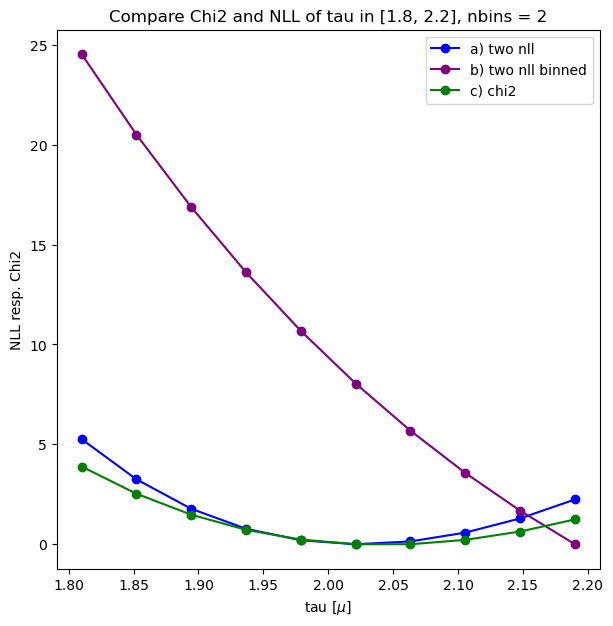

In [42]:


# calculation from 2a)
two_nll_values = [two_nll_tau(ddecay, tau) for tau in taus]
two_nll_values -= min(two_nll_values) # shift of minimum to zero

nbins = 2
# calculation from 2b)
two_nll_values_bin = [binned_2nll(ddecay, tau, nbins) for tau in taus]
two_nll_values_bin -= min(two_nll_values_bin)  # shift of minimum to zero

# calculation of chi squared
chi2_values = [chi2_stat(tau, nbins) for tau in taus]
chi2_values -= min(chi2_values)

# overlay the three plots

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.plot(taus, two_nll_values, marker = "o", color = "blue", label = "a) two nll")
ax.plot(taus, two_nll_values_bin, marker="o", color="purple", label="b) two nll binned")
ax.plot(taus, chi2_values, marker="o", color="green", label="c) chi2")
ax.set_xlabel("tau [$\mu$]")
ax.set_ylabel("NLL resp. Chi2")
ax.set_title("Compare Chi2 and NLL of tau in [1.8, 2.2], nbins = 2")
ax.legend()

This graphic proposes that the binning of NLL function in two bins is less helpful. The NLL trajectory doesn't agree with the one obtained in the unbinned calculation. The Chi function, however, displays the same minimum as the result obtained in the first calculation.

# Fitting polynomial (with more than one parameter)
In the file polynomial *data.dat* we find 30000 measurements of the variable x between the range -1 and 1. The goal is to find out how this data has been generated.

Lets load the data:

In [43]:
data = np.loadtxt("data/polynomial_data.txt")

First we bin these measurements as a histogram with 20 bins and calculate the uncertainty on the number of measurements in each bin using the Poisson distribution.

Text(0, 0.5, 'measurement')

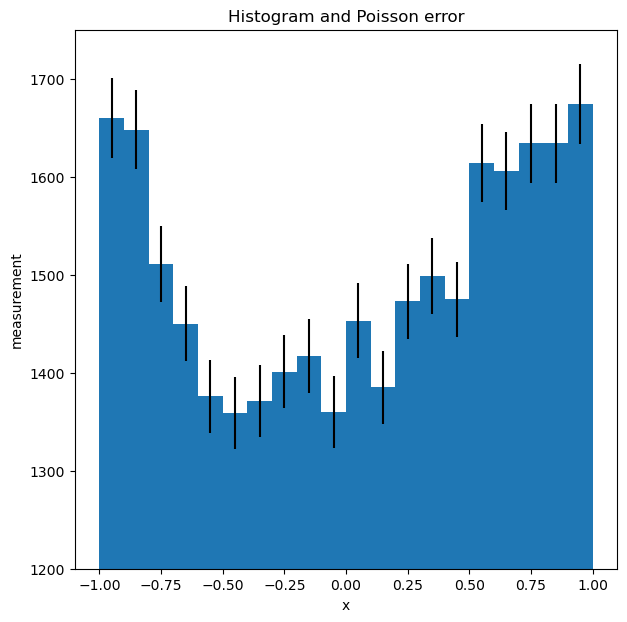

In [44]:
    counts, edges = np.histogram(data, bins=20)
    bincenters = 0.5 * (edges[1:] + edges[:-1])
    binwidths = np.array([edges[i] - edges[i - 1] for i in range(len(edges))])

    # plot the histogram

    fig, ax = plt.subplots(1, 1, figsize=(7, 7))

    ax.bar(bincenters, counts, binwidths[1:], yerr = counts ** 0.5) # apply N square rule for poisson errors
    ax.set_title("Histogram and Poisson error")
    ax.set_ylim(1200, 1750)
    ax.set_xlabel("x")
    ax.set_ylabel("measurement")
    # ax.legend()

In a next step, we use the least-squares method `scipy.optimize.curve_fit` to fit a polynomial of first, second, third and fourth degree to the histogram bins, taking the x-value to be the centre of each histogram bin and the y-value to be the number of measurements. We plot the resulting polynomial fits overlaid on the histogram.

In [45]:
# define a polynomial function
def polynomial(x, popt, order = None):

    if order == 1:
        a, b = popt
        return a * x + b

    elif order == 2:
        a, b, c = popt
        return a * x ** 2 + b * x + c

    elif order == 3:
        a, b, c, d = popt
        return a * x ** 3 + b * x ** 2 + c * x + d

    elif order == 4:
        a, b, c, d, e = popt
        return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e

    else:
        raise ValueError("Please specify order of polynomial.")

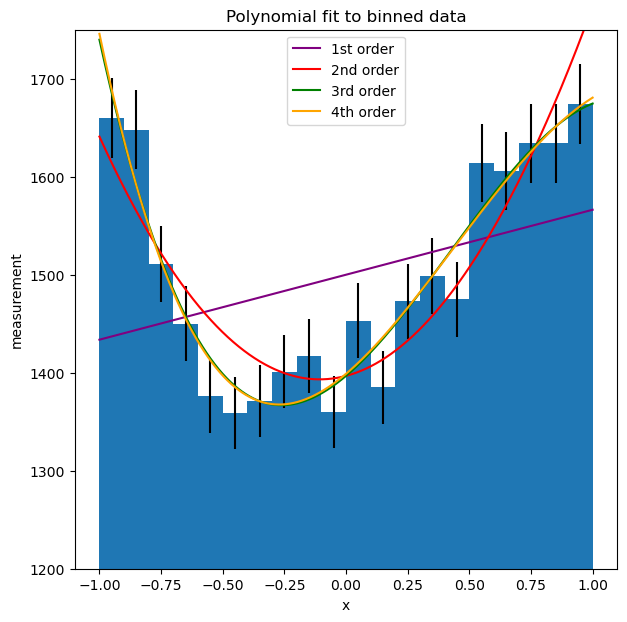

In [46]:
counts, edges = np.histogram(data, bins=20)
x = 0.5 * (edges[1:] + edges[:-1])
y = counts

# calculate the optimized parameters to later fit and covariances
popt1, pcov1 = opt.curve_fit(f = (lambda x, a, b: a * x + b), xdata = x, ydata = y)
popt2, pcov2 = opt.curve_fit((lambda x, a, b, c: a * x ** 2 + b * x + c), x, y)
popt3, pcov3 = opt.curve_fit((lambda x, a, b, c, d: a * x ** 3 + b * x ** 2 + c * x + d), x, y)
popt4, pcov4 = opt.curve_fit((lambda x, a, b, c, d, e: a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e), x, y)


xs = np.linspace(-1, 1, 30000)
binwidths = np.array([edges[i] - edges[i - 1] for i in range(len(edges))])
bincenters = x

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.bar(bincenters, counts, binwidths[1:], yerr=counts ** 0.5)  # apply N square rule for poisson errors
ax.plot(xs, polynomial(x = xs, popt = popt1, order = 1), label = "1st order", color = "purple")
ax.plot(xs, polynomial(x=xs, popt=popt2, order=2), label="2nd order", color = "red")
ax.plot(xs, polynomial(x=xs, popt=popt3, order=3), label="3rd order", color = "green")
ax.plot(xs, polynomial(x=xs, popt=popt4, order=4), label="4th order", color = "orange")

ax.set_title("Polynomial fit to binned data")
ax.set_ylim(1200, 1750)
ax.set_xlabel("x")
ax.set_ylabel("measurement")
ax.legend()

For each fit, we calculate the uncertainties on the parameters using the covariance matrix returned by the `scipy.optimize.curv_fit` method.

In [47]:
def extract_sigma(pcov):
    return round(pcov[0][1] ** 0.5, 2)


print(f"The uncertainties are as follows: \n"
      f"1st order: {extract_sigma(pcov1)}\n"
      f"2nd order: {extract_sigma(pcov2)}\n"
      f"3rd order: {extract_sigma(pcov3)}\n"
      f"4th order: {extract_sigma(pcov4)}")

The uncertainties are as follows: 
1st order: 0.37
2nd order: 0.49
3rd order: 0.82
4th order: 1.99


Next, we use the optimal fitting parameters to calculate the $\chi^2/ndf$ for the different fits and plot it as a function of the degrees of the polynomial.

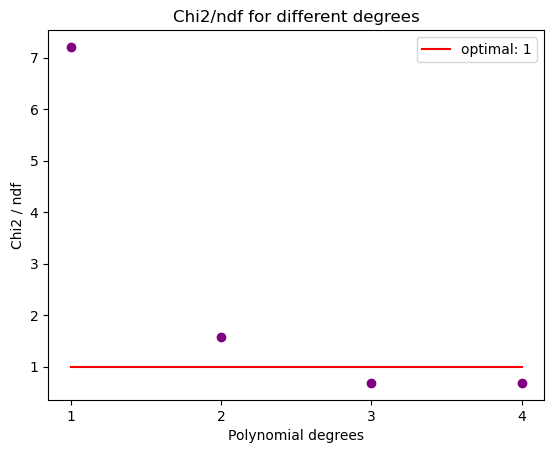

In [48]:
def chi2_opt(x, y):
    return np.sum((x - y) ** 2)

counts, edges = np.histogram(data, bins=20)
x = 0.5 * (edges[1:] + edges[:-1])
y = counts

df_inital = 30000

fit1 = chi2_opt(y, polynomial(x=x, popt=popt1, order=1)) / (30000 - len(popt1))  # chi2 / ndf
fit2 = chi2_opt(y, polynomial(x=x, popt=popt2, order=2)) / (30000 - len(popt2))  # chi2 / ndf
fit3 = chi2_opt(y, polynomial(x=x, popt=popt3, order=3)) / (30000 - len(popt3))  # chi2 / ndf
fit4 = chi2_opt(y, polynomial(x=x, popt=popt4, order=4)) / (30000 - len(popt4))  # chi2 / ndf

plot_x = [1, 2, 3, 4]
plot_y = [fit1, fit2, fit3, fit4]
line_y = [1, 1, 1, 1]

fig, ax = plt.subplots()

ax.scatter(plot_x, plot_y, color = "purple")
ax.plot(plot_x, line_y, color = "red", label = "optimal: 1")
ax.set_title("Chi2/ndf for different degrees")
ax.set_xlabel("Polynomial degrees")
ax.set_ylabel("Chi2 / ndf")
ax.set_xticks([1, 2, 3, 4])
ax.legend()

We know that a $\chi^2/ndf$ ration of 1 is the optimal balance between over- and underfitting. Below one it means to have overfitted our polynomial fit. Looking at the graphic above we can conclude that the data was generated with third or fourth order, as the fits of these is almost identical.